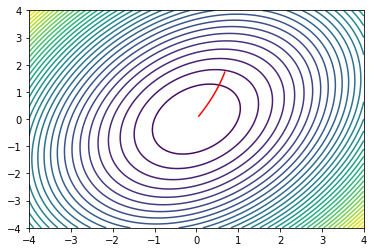

f_min:  0.004082252730477302   iterations:   101
[0.6788373  1.72667637] 0.9311807210809588
[0.05784865 0.10942953] 0.004082252730477302


In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f1(x): 
    return (x[0]**2)/2 + (x[1]**2)/3 - (x[0]*x[1])/4

def init(x_min, x_max, y_min, y_max):
    x0 = x_min + np.random.random() * (x_max - x_min)
    y0 = y_min + np.random.random() * (y_max - y_min)
    return [x0, y0]

x_min, x_max = -4, 4
y_min, y_max = -4, 4                   

nx = np.linspace(x_min, x_max, 400)
ny = np.linspace(y_min, y_max, 400)

def derivative2(f, xy, d=0.0001):
    x, y = xy[0], xy[1]
    fx = ( f([x+d/2,y]) - f([x-d/2,y]) )/d #Take the centered derivatives
    fy = ( f([x,y+d/2]) - f([x,y-d/2]) )/d
    #print(fx,fy)
    return np.array([fx,fy])

def minimize_fix(f,x0, N=100):
    
    xnow = x0
    converged = False
    xhist = []
    xhist.append(xnow)
    dx = 0.05

    for i in range(N):
        
        dfnow = derivative2(f, xnow) 
        xnext = xnow - dfnow*dx
        
        if f(xnext)>f(xnow):
            converged = True
            break
        else:
            xnow = xnext
            xhist.append(xnow)

    return converged, np.array(xhist), f(xnow)


[x0, y0] = init(x_min, x_max, y_min, y_max)
converged, x_hist, f_min = minimize_fix(f1, [x0,y0])


x,y = np.meshgrid(nx,ny)
z = f1([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.5) #Hey, if we can just find the min of z here, this is technically redundant!
plt.contour(x,y,z, levels=levels)


plt.plot(x_hist[:,0], x_hist[:,1], 'r-') #Line!
plt.show()

print('f_min: ', f_min, '  iterations:  ', len(x_hist))
print(x_hist[0], f1(x_hist[0]))
print(x_hist[-1], f1(x_hist[-1]))



In [27]:
import scipy.optimize
[x0, y0] = init(x_min, x_max, y_min, y_max)
scipy.optimize.minimize(f1, [x0, y0], method = "L-BFGS-B", tol = .01, options = {"disp" : True})

      fun: 1.1805340463813061e-11
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.51324255e-06, -2.53282329e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([ 3.92516834e-06, -2.33229681e-06])

In [ ]:
#Did it